In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#DATASET : iris
#DATA CLEANING:
# (not required, as iris is a good dataset :>)

In [4]:
!cd /kaggle/input/iris

In [5]:
iris_pd = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [6]:
iris_dataset = iris_pd.to_numpy()

In [7]:
print(f"number of records: {iris_dataset.shape[0]}")
print(f"number of features per record: {iris_dataset.shape[1]}")

number of records: 150
number of features per record: 6


In [8]:
iris_pd

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
X = np.delete(iris_dataset, 5, axis = 1)
X = np.delete(X, 0, axis = 1)
y = np.delete(iris_dataset, (0,1,2,3,4), axis = 1)

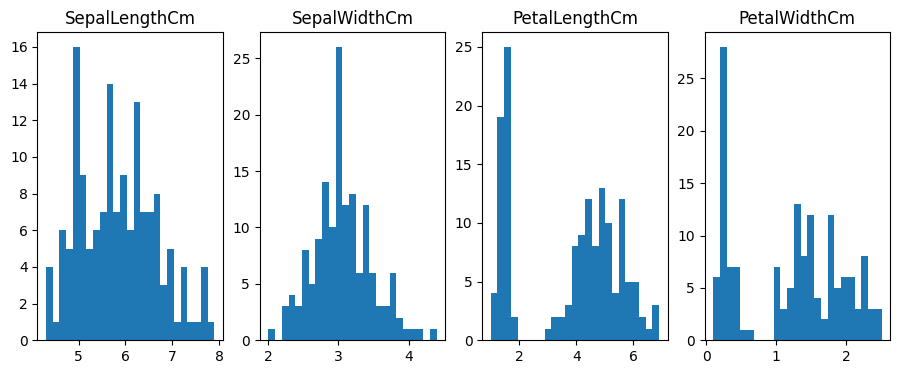

In [11]:
plt.figure(figsize = (11,4))
plt.subplot(1,4,1)
plt.hist(X[:,0], bins = 25)
plt.title("SepalLengthCm")
plt.subplot(1,4,2)
plt.hist(X[:,1], bins = 25)
plt.title("SepalWidthCm")
plt.subplot(1,4,3)
plt.hist(X[:,2], bins = 25)
plt.title("PetalLengthCm")
plt.subplot(1,4,4)
plt.hist(X[:,3], bins = 25)
plt.title("PetalWidthCm")
plt.show()

In [12]:
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=41)

#TESTING THE PERFORMANCE OF DIFFERENT CLASSIFIERS
k-NN classifier

SVM

Decision trees


In [18]:
iris_knn = KNeighborsClassifier(n_neighbors=5,
                     weights='uniform',
                     algorithm='auto',
                     leaf_size=30,
                     p=2,
                     metric='minkowski',
                     metric_params=None,
                     n_jobs=None)

iris_knn.fit(X_train,y_train)
predictions = iris_knn.predict(X_test)
knn_matrix = confusion_matrix(y_test,predictions)
knn_result = iris_knn.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [19]:
iris_tree = DecisionTreeClassifier(criterion='entropy',
                                   splitter='best',
                                   max_depth=5,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0,
                                   max_features=None,
                                   random_state=2137,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0)

iris_tree.fit(X_train, y_train)
predictions = iris_tree.predict(X_test)
tree_matrix = confusion_matrix(y_test,predictions)
decision_tree_result = iris_tree.score(X_test, y_test)

In [20]:
iris_SVC = SVC(C=1.0,
               kernel='rbf',
               degree=3,
               gamma='scale',
               coef0=0.0,
               shrinking=True,
               probability=False,
               tol=0.001,
               cache_size=200,
               max_iter=-1,
               break_ties=False,
               random_state=1234)

iris_SVC.fit(X_train, y_train)
predictions = iris_SVC.predict(X_test)
SVM_matrix = confusion_matrix(y_test,predictions)
print(f"SVM confusion matrix:\n {SVM_matrix}")
SVM_result = iris_SVC.score(X_test, y_test)

SVM confusion matrix:
 [[11  0  0]
 [ 0 16  2]
 [ 0  1 15]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print(f"accuracy for knn_classifier: {knn_result*100}%")
print(f"accuracy for decision_tree_classifier: {decision_tree_result*100}%")
print(f"accuracy for SVM_classifier: {SVM_result*100}%")
print("\n")
print(f"knn_classifier confusion matrix:\n {knn_matrix}")
print(f"decision_tree_classifier confusion matrix:\n {tree_matrix}")
print(f"SVM confusion matrix:\n {SVM_matrix}")
print("\n")

print("there is also no need for automated hyperparameter tuning like gridsearch as intuitive ones seem to work almost perfectly.")
print("I decided not to create validation dataset for two reasons:")
print("1. Iris dataset is very small with only 150 records, which makes every sample extremely valuable.")
print("2. It is not possible, that parameters were tuned specifically for test dataset, as there was no tuning and different seeds lead to exactly the same results.")

accuracy for knn_classifier: 93.33333333333333%
accuracy for decision_tree_classifier: 91.11111111111111%
accuracy for SVM_classifier: 93.33333333333333%


knn_classifier confusion matrix:
 [[11  0  0]
 [ 0 16  2]
 [ 0  1 15]]
decision_tree_classifier confusion matrix:
 [[11  0  0]
 [ 0 17  1]
 [ 0  3 13]]
SVM confusion matrix:
 [[11  0  0]
 [ 0 16  2]
 [ 0  1 15]]


there is also no need for automated hyperparameter tuning like gridsearch as intuitive ones seem to work almost perfectly.
I decided not to create validation dataset for two reasons:
1. Iris dataset is very small with only 150 records, which makes every sample extremely valuable.
2. It is not possible, that parameters were tuned specifically for test dataset, as there was no tuning and different seeds lead to exactly the same results.
